# Brightness Preserving Bi-Histogram Equalization

In [26]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [41]:
def BBHE(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Calculate the histogram
    hist, bins = np.histogram(gray.flatten(), 256, [0, 256])

    # Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Calculate the equalization transform
    equalization_transform = np.interp(gray.flatten(), bins[:-1], cdf_normalized)

    # Reshape the equalization transform to the shape of the original image
    equalization_transform = equalization_transform.reshape(gray.shape)

    # Apply the equalization transform to the original image
    equalized_image = (equalization_transform * 255).astype(np.uint8)

    return equalized_image

# Read an image from file
input_image = cv2.imread('C:\JN\chaubey/sp12/0136.jpg')

# Apply BBHE
result_image = BBHE(input_image)

In [28]:
# Display the original and equalized images
plt.figure(figsize=(10, 5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

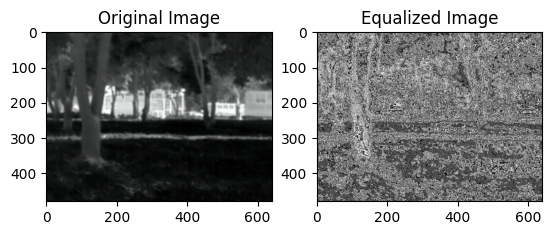

In [29]:
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow( result_image, cmap='gray')
plt.title('Equalized Image')

plt.show()

In [30]:
# Calculate histograms
hist_original = cv2.calcHist([input_image], [0], None, [256], [0, 256])
hist_equalized = cv2.calcHist([result_image], [0], None, [256], [0, 256])

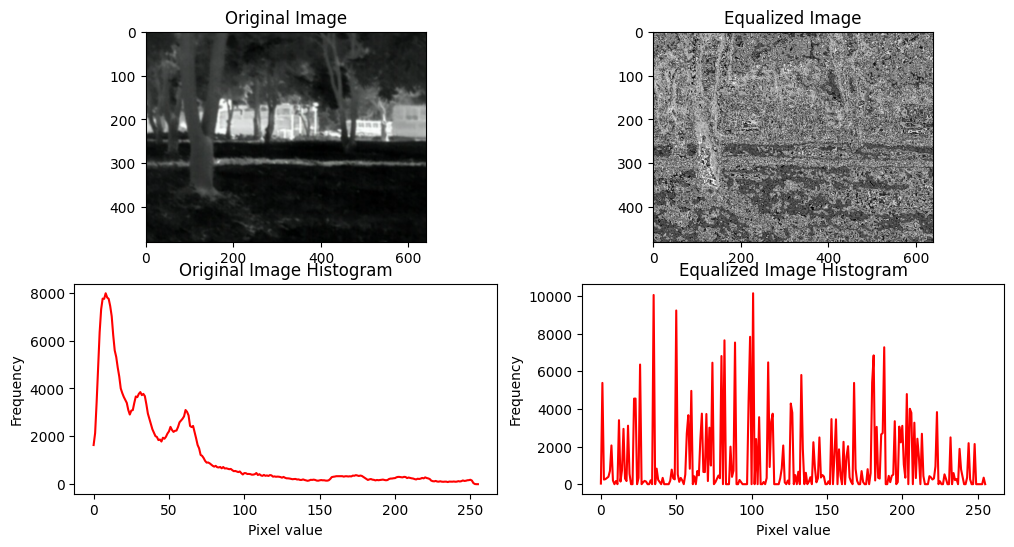

In [31]:
# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Equalized Image')

plt.subplot(2, 2, 3)
plt.plot(hist_original, color='red')
plt.title('Original Image Histogram')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='red')
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.show()

In [43]:
start_time = time.time()

In [44]:
# Record the elapsed time
elapsed_time = time.time() - start_time

In [45]:
print(f"Computational Time: {elapsed_time:.4f} seconds")

Computational Time: 3.3130 seconds
